**Importing all the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

--2023-10-31 17:20:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.61, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.09s   

2023-10-31 17:20:56 (38.0 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**BASIC OBSERVATION OF DATA**

In [ ]:
#basic observation on shape of data
df.shape

(8807, 12)

In [ ]:
#only column:release_year is in int , rest all in object
df.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#statistical analysis
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**MISSING VALUES**

In [ ]:
#we can see , we have null values in columns director,cast,country,date_added,rating and duration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


-> As we can see the missing values' percentage, we conclude director column has the **highest** missing percentage of about  *29%* so we can impute its values which is imputed in the below section.

-> Also **country and cast columns** account about *9%* missing values which can be discarded generally but I have imputed them as well

->The columns like **date_added,duration,rating** account for the **least** percentage .Their values are discarded.

In [ ]:
len(df[df['rating'].isnull()==True])*100/df.shape[0]

0.04541841716816169

In [ ]:
len(df[df['duration'].isnull()==True])*100/df.shape[0]

0.034063812876121265

In [ ]:
len(df[df['date_added'].isnull()==True])*100/df.shape[0]

0.11354604292040422

In [ ]:
len(df[df['country'].isnull()==True])*100/df.shape[0]

9.43567616668559

In [ ]:
len(df[df['cast'].isnull()==True])*100/df.shape[0]

9.367548540933349

In [ ]:
len(df[df['director'].isnull()==True])*100/df.shape[0]

29.908027705234474

Dropping columns rating,duration, & date_added missing values

In [ ]:
#dropping rows where date_added column has NA values
df.dropna(how='any' ,subset=['date_added'],inplace=True)

#dropping rows where duration column has NA values
df.dropna(how='any' ,subset=['duration'],inplace=True)

#dropping rows where rating column has NA values
df.dropna(how='any' ,subset=['rating'],inplace=True)

**UNNESTING DATA**



*   Exploded all columns(containing unnested data) except cast which we can do later as per the requirements in future.
*   Stripping the listed_in column to  have uniformity in data.



In [ ]:
#unnesting column director
df['director'] = df['director'].str.split(',')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#exploding on director
df=df.explode('director')


In [ ]:
#unnesting column country and exploding that
df['country']=df['country'].str.split(',')
df=df.explode('country')
df['country']=df['country'].str.strip(' ')

In [ ]:
#unnesting column listed_in and exploding that and removing trailing and leading spaces
df['listed_in']=df['listed_in'].str.split(',')
df=df.explode('listed_in')
df['listed_in']=df['listed_in'].str.strip(' ')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


-> In the listed_in column we can see we have differenet genres but to use
them in a more generalized manner we can remove **'movies & TV shows'** from their suffix and prefix

-> Treating  **Docuseries as Documentaries** and making other changes so to have generalized genres

In [ ]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
#Removing TV and TV Shows from suffix and prefix
df['listed_in']=df['listed_in'].str.removesuffix('TV Shows')\
                               .str.removeprefix('TV')\
                               .str.removesuffix('TV')
df['listed_in']=df['listed_in'].apply(lambda x: 'Other TV Shows' if x == '' else x.strip(' '))

#Removing Movies from suffix
df['listed_in']=df['listed_in'].str.removesuffix('Movies')
df['listed_in']=df['listed_in'].apply(lambda x: 'Other Movies' if x == '' else x.strip(' '))

#Treating the remaing genres
genre_d={'Docuseries': 'Documentaries',
          'Anime Features' :'Anime',
           "Kids'":'Kids' }
df['listed_in'] =df['listed_in'].apply(lambda x: genre_d.get(x,x))



In [ ]:
#listed_in column after some cleaning
df['listed_in'].unique()

array(['Documentaries', 'International', 'Dramas', 'Mysteries', 'Crime',
       'Action & Adventure', 'Reality', 'Romantic', 'Comedies', 'Horror',
       'Children & Family', 'Independent', 'British', 'Spanish-Language',
       'Thrillers', 'Music & Musicals', 'Sci-Fi & Fantasy', 'Kids',
       'Classic', 'Anime', 'Sports', 'Anime Series', 'Korean',
       'Science & Nature', 'Teen', 'Cult', 'Other TV Shows',
       'Faith & Spirituality', 'LGBTQ', 'Stand-Up Comedy', 'Other Movies',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult'], dtype=object)

Since no unnesting was done on cast column we have the final shape as above. If any our analysis include **cast** column we can explode it later

In [ ]:
df.shape

(25871, 12)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International,A scrappy but poor boy worms his way into a ty...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25871 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       25871 non-null  object
 1   type          25871 non-null  object
 2   title         25871 non-null  object
 3   director      19329 non-null  object
 4   cast          23722 non-null  object
 5   country       24049 non-null  object
 6   date_added    25871 non-null  object
 7   release_year  25871 non-null  int64 
 8   rating        25871 non-null  object
 9   duration      25871 non-null  object
 10  listed_in     25871 non-null  object
 11  description   25871 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


In [ ]:
#finding mode of directors per genre
director_mode=df.groupby(['listed_in']).agg({'director': pd.Series.mode})
director_mode

,director
listed_in,
Action & Adventure,Martin Campbell
Anime,Toshiya Shinohara
Anime Series,Jay Oliva
British,Alastair Fothergill
Children & Family,Rajiv Chilaka
Classic,Youssef Chahine
Classic & Cult,Phil Sgriccia
Comedies,Raja Gosnell
Crime,"[Cecilia Peck, Justin Webster]"


In [ ]:
#in directors column of this group , if length>0 ,and if it's a string we are taking x else we are picking first values from a list
director_mode['director']=director_mode['director'].apply(lambda x: x if isinstance(x,str) else x[0] if len(x)>0 else np.nan)
director_mode


,director
listed_in,
Action & Adventure,Martin Campbell
Anime,Toshiya Shinohara
Anime Series,Jay Oliva
British,Alastair Fothergill
Children & Family,Rajiv Chilaka
Classic,Youssef Chahine
Classic & Cult,Phil Sgriccia
Comedies,Raja Gosnell
Crime,Cecilia Peck


In [ ]:
def director_mode_func(grp):
  grp['director_mode']=grp['director'].mode().values[0]
  return grp
df=df.groupby('listed_in').apply(director_mode_func)


<ipython-input-107-8f85885902b2>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df=df.groupby('listed_in').apply(director_mode_func)


In [ ]:
df['director']=df['director'].fillna(df['director_mode'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Matthew Salleh
1,s2,TV Show,Blood & Water,Youssef Chahine,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Dramas,"After crossing paths at a party, a Cape Town t...",Youssef Chahine
1,s2,TV Show,Blood & Water,Youssef Chahine,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International,"After crossing paths at a party, a Cape Town t...",Youssef Chahine
1,s2,TV Show,Blood & Water,Quek Shio-chuan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,Mysteries,"After crossing paths at a party, a Cape Town t...",Quek Shio-chuan
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,Martin Campbell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family,"Dragged from civilian life, a former superhero...",Rajiv Chilaka
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",Raja Gosnell
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,Youssef Chahine
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International,A scrappy but poor boy worms his way into a ty...,Youssef Chahine


In [ ]:
#Instead of Imputing I'm  filling values  with string NAN
df['country'].fillna('NAN',inplace=True)
df['cast'].fillna("NAN", inplace=True)


In [ ]:
#No missing values
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
director_mode    0
dtype: int64

**TOP 5 GENRES IN MOVIES AND TV SHOWS**

In [ ]:
tl_data=df.groupby(['type','listed_in'])['show_id'].nunique().reset_index().sort_values(by=['type','show_id'],ascending=[True,False])
tl_data


,type,listed_in,show_id
11,Movie,International,2752
7,Movie,Dramas,2426
4,Movie,Comedies,1674
6,Movie,Documentaries,869
0,Movie,Action & Adventure,859
10,Movie,Independent,756
2,Movie,Children & Family,641
15,Movie,Romantic,616
19,Movie,Thrillers,577
13,Movie,Music & Musicals,375


In [ ]:
top_5_movies=tl_data[tl_data['type']=='Movie'].head()
top_5_shows=tl_data[tl_data['type']=='TV Show'].head()

In [ ]:
top_5_shows

,type,listed_in,show_id
29,TV Show,International,1349
27,TV Show,Dramas,762
24,TV Show,Comedies,573
25,TV Show,Crime,469
30,TV Show,Kids,448


In [ ]:
top_5_movies

,type,listed_in,show_id
11,Movie,International,2752
7,Movie,Dramas,2426
4,Movie,Comedies,1674
6,Movie,Documentaries,869
0,Movie,Action & Adventure,859


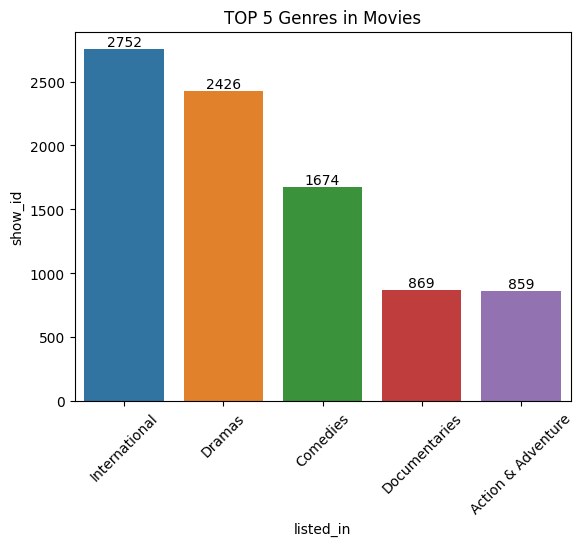

In [ ]:
plt.xticks(rotation=45)
plt.title('TOP 5 Genres in Movies')
ax=sns.barplot(data=top_5_movies, x='listed_in',y='show_id')
for i in ax.containers:
    ax.bar_label(i,)

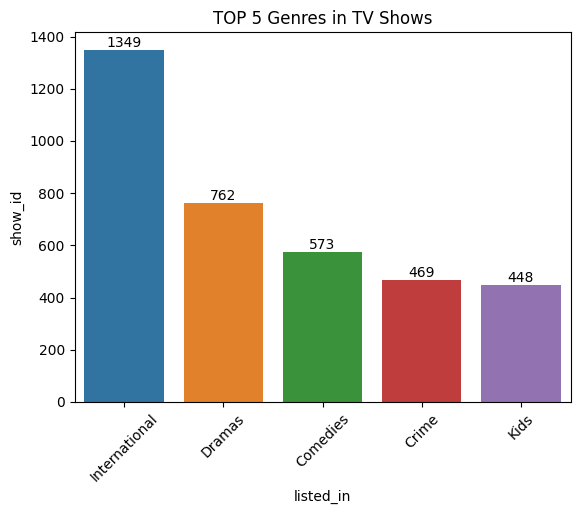

In [ ]:

plt.xticks(rotation=45)
plt.title('TOP 5 Genres in TV Shows')
ax=sns.barplot(data=top_5_shows, x='listed_in',y='show_id')
for i in ax.containers:
    ax.bar_label(i,)




1.   The **top 3 genres** in both Movies and TV Shows are same.
2.   Also, the **International genre** is doing better in Movies as compared to TV Shows so considering this genre,
**Recommendation:** one should focus on Movies instead of TV Shows. Likewise for the Dramas & Comedies

3. The top 3 genres in Movies have  > 150% increase compared to TV Shows.



   






In [ ]:
# A dataframe made to have a look on top_5_shows and top_5_movies
df2=pd.concat([top_5_movies,top_5_shows])
df2

,type,listed_in,show_id
11,Movie,International,2752
7,Movie,Dramas,2426
4,Movie,Comedies,1674
6,Movie,Documentaries,869
0,Movie,Action & Adventure,859
29,TV Show,International,1349
27,TV Show,Dramas,762
24,TV Show,Comedies,573
25,TV Show,Crime,469
30,TV Show,Kids,448


**TOP 10 Countries With Highest Number Of Movies & TV Shows**

In [ ]:
#selected columns with which i want to start fetching data
country_genre=df[['show_id','title','country','type','listed_in']]
country_genre.head()

,show_id,title,country,type,listed_in
0,s1,Dick Johnson Is Dead,United States,Movie,Documentaries
1,s2,Blood & Water,South Africa,TV Show,Dramas
1,s2,Blood & Water,South Africa,TV Show,International
1,s2,Blood & Water,South Africa,TV Show,Mysteries
2,s3,Ganglands,NAN,TV Show,Action & Adventure


In [ ]:
movie_country_genre=country_genre[country_genre['type']=='Movie']

In [ ]:
TVShow_country_genre=country_genre[country_genre['type']=='TV Show']
TVShow_country_genre

,show_id,title,country,type,listed_in
1,s2,Blood & Water,South Africa,TV Show,Dramas
1,s2,Blood & Water,South Africa,TV Show,International
1,s2,Blood & Water,South Africa,TV Show,Mysteries
2,s3,Ganglands,NAN,TV Show,Action & Adventure
2,s3,Ganglands,NAN,TV Show,Crime
...,...,...,...,...,...
8800,s8801,Zindagi Gulzar Hai,Pakistan,TV Show,International
8800,s8801,Zindagi Gulzar Hai,Pakistan,TV Show,Romantic
8803,s8804,Zombie Dumb,NAN,TV Show,Comedies
8803,s8804,Zombie Dumb,NAN,TV Show,Kids


In [ ]:
top_10_movie_country=movie_country_genre['country'].value_counts().reset_index()[:10]
top_10_movie_country.columns=['country','movie_count']
top_10_movie_country

,country,movie_count
0,United States,5663
1,India,2772
2,United Kingdom,1155
3,NAN,930
4,France,840
5,Canada,732
6,Spain,458
7,Germany,438
8,Japan,382
9,China,291


In [ ]:
top_10_tvshow_country=TVShow_country_genre['country'].value_counts().reset_index()[:10]
top_10_tvshow_country.columns=['country','tvshow_count']
top_10_tvshow_country

,country,tvshow_count
0,United States,1787
1,NAN,892
2,United Kingdom,722
3,South Korea,494
4,Japan,442
5,Canada,248
6,Taiwan,230
7,India,227
8,France,202
9,Spain,184


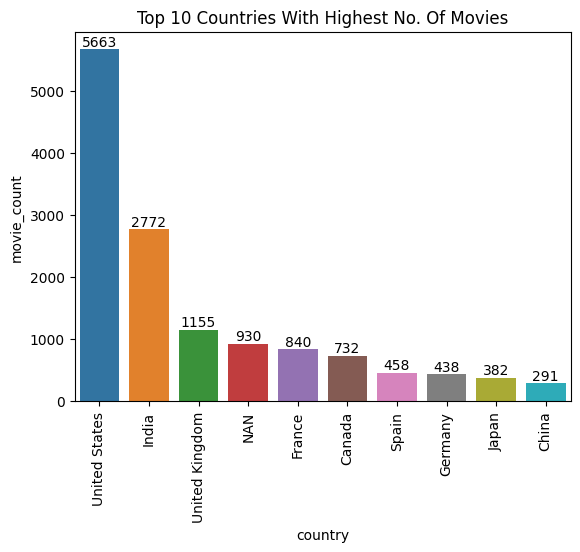

In [ ]:
ax=sns.barplot(top_10_movie_country,x='country',y='movie_count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top 10 Countries With Highest No. Of Movies')
plt.show()


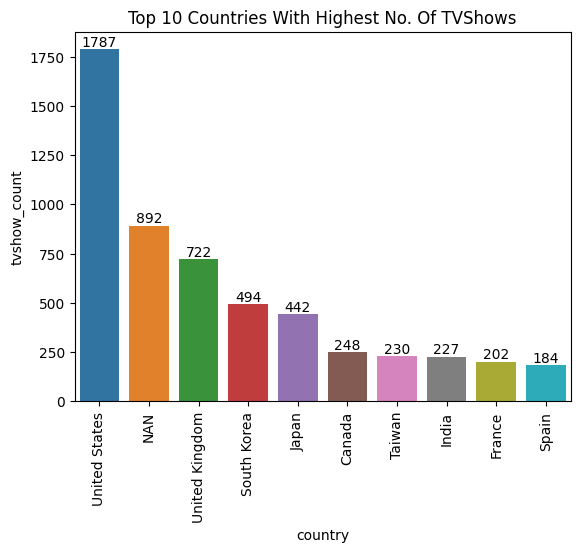

In [ ]:
ax=sns.barplot(top_10_tvshow_country,x='country',y='tvshow_count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top 10 Countries With Highest No. Of TVShows')
plt.show()



1.   USA tops in both TV_shows and Movies but count of movies > count of tvshows
2.  Here NAN values in movies and tv_shows  can be considered as outliers and could have played more role in the count of analysis.
3. In our country, Movies accounts for the second highest after USA as compared to TV Shows.

**Recommendation: TVShows genres should  be targeted for audience preference so that we can improve in TVShows as well**

4.   ALso, we can see South Korea (i.e. The famous K dramas) has place in TVShows .Similar recommendation as above for South Korea
5.   We can see China also holds the 10th position in top_10_movies.





**TOP 10 Movie Directors**

In [ ]:
#we are just picking the following columns and making a director_movie, also there are no null values
director_df=df[['show_id','title','director','type']]
director_df.isnull().sum()

show_id     0
title       0
director    0
type        0
dtype: int64

In [ ]:
#same things written in 2 different ways
#director_movie=director_df[director_df['type']=='Movie']
#director_movie.groupby('director').agg({'show_id':pd.Series.count}).reset_index().sort_values('show_id',ascending=False).head(10)


In [ ]:
director_movie=director_df[director_df['type']=='Movie']
top_10_mdirector=director_movie['director'].value_counts()[:10].reset_index()
top_10_mdirector.columns=['director','movie_count']
top_10_mdirector

,director,movie_count
0,Youssef Chahine,123
1,Matthew Salleh,87
2,Rajiv Chilaka,64
3,Raja Gosnell,56
4,Cathy Garcia-Molina,48
5,Jan Suter,43
6,Lars von Trier,38
7,Martin Scorsese,36
8,Thomas Astruc,35
9,Martin Campbell,34


Text(0.5, 1.0, 'Top 10 Movie Directors')

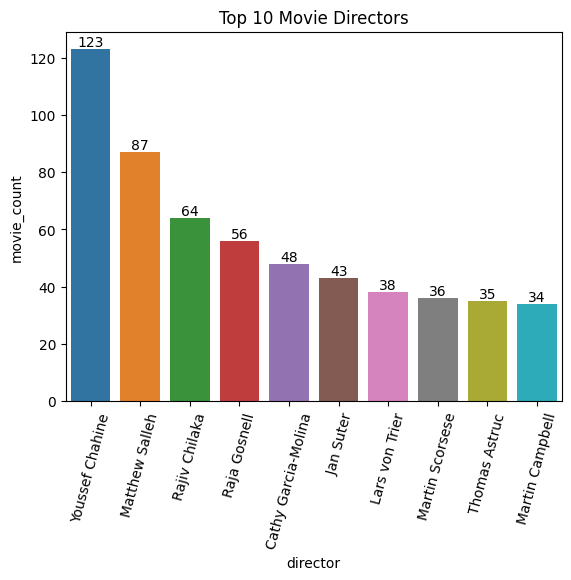

In [ ]:
ax=sns.barplot(top_10_mdirector,x='director',y='movie_count')
for i in ax.containers:
  ax.bar_label(i,)

plt.xticks(rotation=75)
plt.title('Top 10 Movie Directors')

**Creation of rating and date table**

In [ ]:
dates_rating=df[['show_id','date_added','release_year','rating','duration','type']]
dates_rating.head()

,show_id,date_added,release_year,rating,duration,type
0,s1,"September 25, 2021",2020,PG-13,90 min,Movie
1,s2,"September 24, 2021",2021,TV-MA,2 Seasons,TV Show
1,s2,"September 24, 2021",2021,TV-MA,2 Seasons,TV Show
1,s2,"September 24, 2021",2021,TV-MA,2 Seasons,TV Show
2,s3,"September 24, 2021",2021,TV-MA,1 Season,TV Show


In [ ]:
dates_rating['date_added']=pd.to_datetime(dates_rating['date_added'])
dates_rating['day_added']=dates_rating['date_added'].dt.day
dates_rating['month']=dates_rating['date_added'].dt.month
dates_rating['year']=dates_rating['date_added'].dt.year
dates_rating.head()

<ipython-input-130-e2ce7f846385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_rating['date_added']=pd.to_datetime(dates_rating['date_added'])
<ipython-input-130-e2ce7f846385>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_rating['day_added']=dates_rating['date_added'].dt.day
<ipython-input-130-e2ce7f846385>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,show_id,date_added,release_year,rating,duration,type,day_added,month,year
0,s1,2021-09-25,2020,PG-13,90 min,Movie,25,9,2021
1,s2,2021-09-24,2021,TV-MA,2 Seasons,TV Show,24,9,2021
1,s2,2021-09-24,2021,TV-MA,2 Seasons,TV Show,24,9,2021
1,s2,2021-09-24,2021,TV-MA,2 Seasons,TV Show,24,9,2021
2,s3,2021-09-24,2021,TV-MA,1 Season,TV Show,24,9,2021


above segregation  of date_Added column is done just in case if needs further analysis

In [ ]:
dates_rating['rating'].value_counts()

TV-MA       9516
TV-14       6140
R           2668
TV-PG       2396
PG-13       1730
PG          1124
TV-Y7        732
TV-Y         576
TV-G         538
NR           251
G            159
TV-Y7-FV      17
NC-17         13
UR            11
Name: rating, dtype: int64

we have the above ratings with value_count.
**Recommendation**:These are not intuitive so we can use a dictionary to have a better understanding of general audience

In [ ]:
#In TV Shows we have seasons and season(meaning 1) as duration
dates_rating[dates_rating['type']=='TV Show']['duration'].str.split(' ').apply(lambda x: x[1]).unique()


array(['Seasons', 'Season'], dtype=object)

In [ ]:
#In Movies we have duration in minutes
dates_rating[dates_rating['type']=='Movie']['duration'].str.split(' ').apply(lambda x: x[1]).unique()

array(['min'], dtype=object)

In [ ]:
#We have different counts of Tv Shows and Movies' duration
duration_count=dates_rating.duration.str.split(' ').apply(lambda x: x[1]).value_counts().reset_index()
duration_count.columns=['type','count_composition']
duration_count


,type,count_composition
0,min,18805
1,Season,4814
2,Seasons,2252


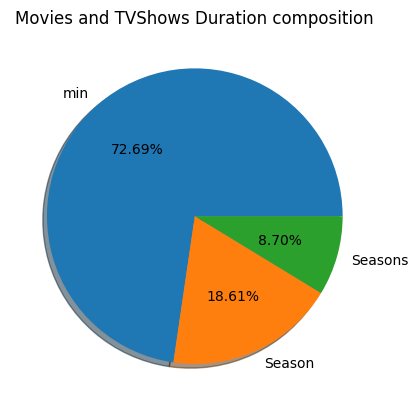

In [ ]:
plt.pie(data=duration_count,x='count_composition',labels='type',shadow=True,autopct='%0.2f%%')
plt.title('Movies and TVShows Duration composition')
plt.show()

We can see we have only few TV Shows of about 8% who has more than 1 seasons.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

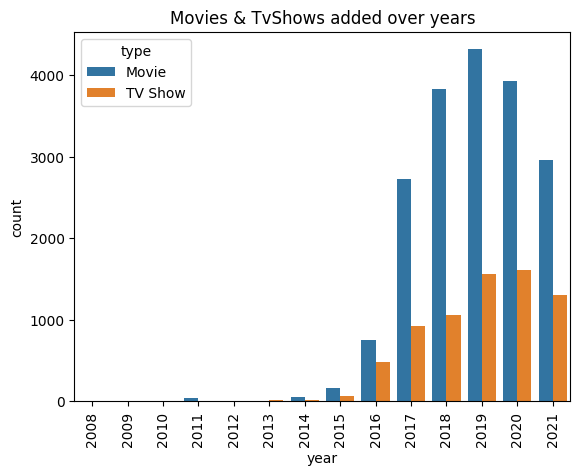

In [ ]:
sns.countplot(data=dates_rating,x='year',hue='type')
plt.title('Movies & TvShows added over years')
plt.xticks(rotation=90)



1.   Netflix began streaming in the year 2007. In 2016,it went live simultaneously
2.   The boom came in 2019 as we can see from data, but due to covid there is a decline in the number.


3.   Also we can see the number of movies are always more in number as compared to TV-shows added on Netflix in different years

**Recommendations:**

**To increase its business:**


1.  **Innovation**: Invest in technology and innovation. Features like interactive storytelling or virtual reality experiences can set Netflix apart
2.   **Licensing**: Explore licensing opportunities. In addition to creating original content, licensing popular shows and movies can attract a broader audience
3.   **Offline Viewing**: Enhance offline viewing options. Allowing users to download content for offline viewing can be particularly important in regions with limited internet access.
4.  **Content Expansion**: Continue investing in a diverse range of high-quality content. This includes not only original series and films but also content from different regions and genres.

For example countries like India and South Korea are good in Movies & Dramas respectively and genre-wise content which is mostly preferred wise audience can play an important role in increasing netflix business









GENRE- WISE ANALYSIS IN FEW COUNTRIES


1.   In East-side ,we can see International genre is more preferred be it movies or TV-Shows compared to others in general
2.   In west-side countries like USA, Dramas are often prefered



In [ ]:
#top 5 genres in USA
USA_top5_g=df[(df['country']=='United States')& (df['type']=='Movie')]['listed_in'].value_counts()[:5].reset_index()
USA_top5_g.columns=['genre','count']
USA_top5_g

,genre,count
0,Dramas,879
1,Comedies,779
2,Documentaries,623
3,Children & Family,489
4,Action & Adventure,447


In [ ]:
##top 5 genres in India
India_top5_g=df[(df['country']=='India')& (df['type']=='Movie')]['listed_in'].value_counts()[:5].reset_index()
India_top5_g.columns=['genre','count']
India_top5_g

,genre,count
0,International,919
1,Dramas,700
2,Comedies,336
3,Independent,187
4,Action & Adventure,141


In [ ]:
##top 5 genres in South Korea
Southkorea_top5_g=df[(df['country']=='South Korea')& (df['type']=='Movie')]['listed_in'].value_counts()[:5].reset_index()
Southkorea_top5_g.columns=['genre','count']
Southkorea_top5_g

,genre,count
0,International,44
1,Dramas,26
2,Comedies,21
3,Action & Adventure,17
4,Thrillers,14


In [ ]:
##top 5 genres in China
China_top5_g=df[(df['country']=='China')& (df['type']=='Movie')]['listed_in'].value_counts()[:5].reset_index()
China_top5_g.columns=['genre','count']
China_top5_g

,genre,count
0,International,78
1,Action & Adventure,68
2,Comedies,38
3,Dramas,33
4,Children & Family,21


In [ ]:
##top 5 genres in Japan
Japan_top5_g=df[(df['country']=='Japan')& (df['type']=='Movie')]['listed_in'].value_counts()[:5].reset_index()
Japan_top5_g.columns=['genre','count']
Japan_top5_g

,genre,count
0,Anime,87
1,International,83
2,Action & Adventure,80
3,Children & Family,27
4,Dramas,23


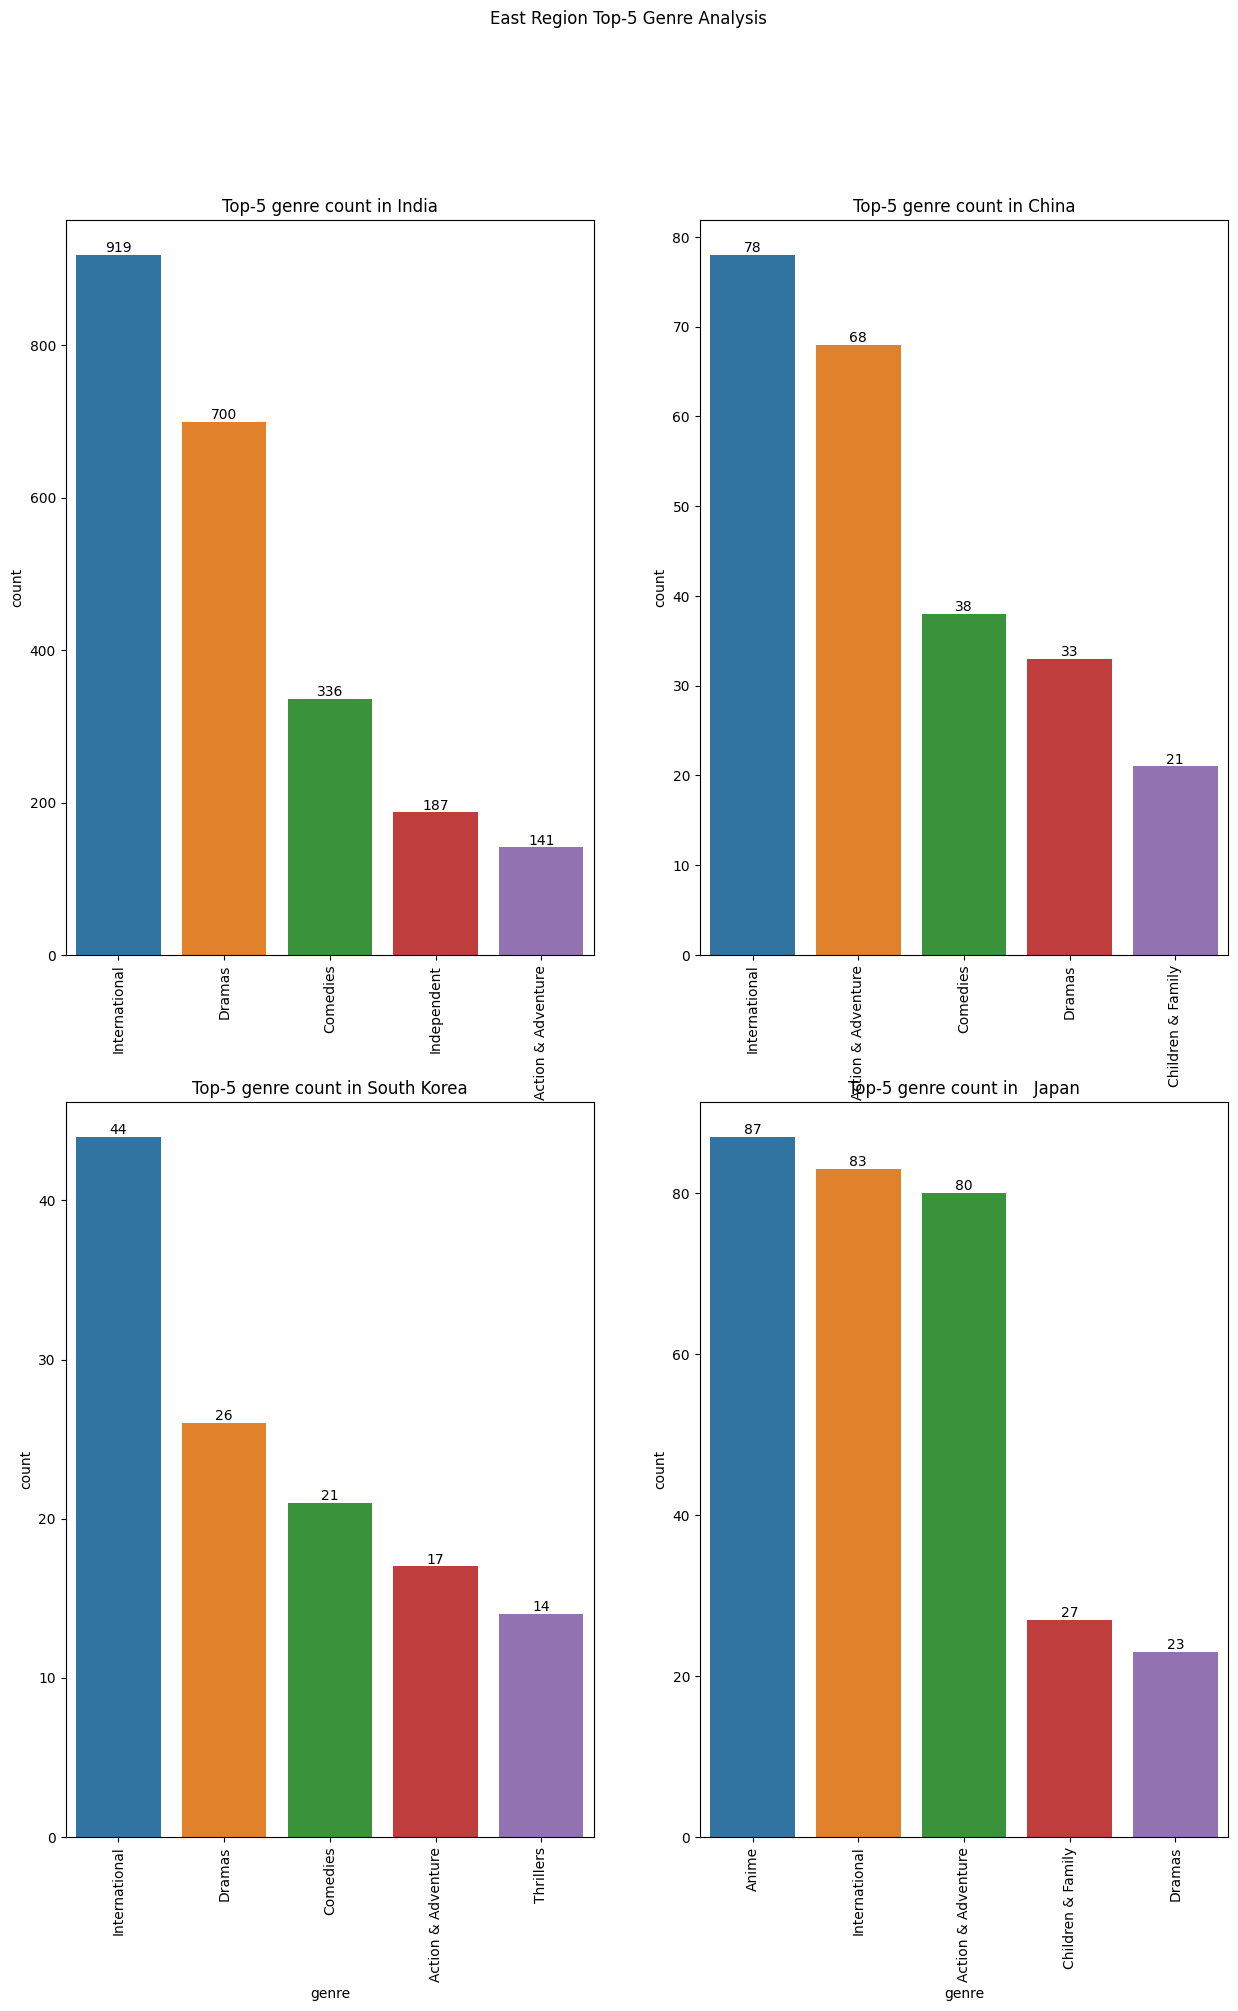

In [ ]:
plt.figure(figsize=(15,21))
plt.suptitle('East Region Top-5 Genre Analysis')
plt.subplot(2,2,1)
ax=sns.barplot(data=India_top5_g,x='genre',y='count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top-5 genre count in India')


plt.subplot(2,2,2)
ax=sns.barplot(data=China_top5_g,x='genre',y='count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top-5 genre count in China')

plt.subplot(2,2,3)
ax=sns.barplot(data=Southkorea_top5_g,x='genre',y='count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top-5 genre count in South Korea')


plt.subplot(2,2,4)
ax=sns.barplot(data=Japan_top5_g,x='genre',y='count')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Top-5 genre count in   Japan')

plt.show()





**Analysis of how long after release_date ,contents were added on netflix**



1.   We can see in the kdeplot we have few values before 0 which will be considered as discrepancy in data
2.   Majority are almost within a span less than 7 years.



<Axes: ylabel='Density'>

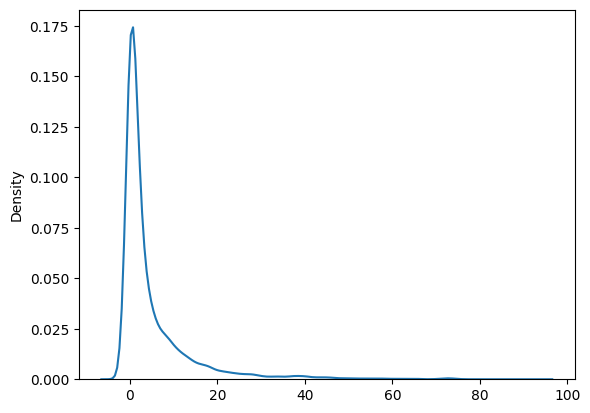

In [ ]:
sns.kdeplot(dates_rating['year']-dates_rating['release_year'])

--------------------------------------------------------THE END------------------------------------------------------------------------------------